---
title: "Convergence: Solow Model"
author: "Pablo Winant"
format:
    html: default
    ipynb: default
---

### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$ 

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.

For now, we ignore the objective and assume that the saving rate $s=\frac{i_t}{y_t}$ is constant over time.

__Create a `NamedTuple` to hold parameter values $\beta=0.96$, $\delta=0.1$, $\alpha=0.3$, $\gamma=4$.__ 

In [ ]:
# how do we record the model informations

In [1]:
# option 1: use structure (your own type)
struct ModelType
    α::Float64
    β
    γ
    δ
end

In [ ]:
model = ModelType(0.3, 0.96, 2.0, 0.1)
# access the fields with a dot
model.α
# problem: you cannot redefine structures without restarting the kernel


0.3

In [4]:
# use a dictionary 

model_dict = Dict(
    :α => 0.3,
    :β => 0.96,
    :γ => 2.0,
    :δ => 0.1
    )

Dict{Symbol, Float64} with 4 entries:
  :α => 0.3
  :γ => 2.0
  :δ => 0.1
  :β => 0.96

In [3]:
# a dictionary is a list of pairs
0 => "zero"

0 => "zero"

In [7]:
# the keys to dictionaries must be immutable objects (hashable)
# for this reason we suse symbols instead of strings

"JIijlkjljasdf  43 '4321514 5"

"JIijlkjljasdf  43 '4321514 5"

In [ ]:
:hkhrd  # this is a symbol (the characters are somwehat restricted.)

:hkhrd

In [9]:
# access the fields with brackets
model_dict[:α]

0.3

In [11]:
model_dict[:α] = 0.4
# you change values: dictionaries are mutable

0.4

In [10]:
# problems with dictionaries:
# - a lot of model_dict[:α]
# - not compiler frienldy

In [12]:
# solution 3: use tuples

model_tuple = (0.3, 0.96, 2.0, 0.1)

(0.3, 0.96, 2.0, 0.1)

In [ ]:
# problem: very error prone because one needs to remember the positions
β = model_tuple[2]

0.96

In [4]:
# 🐉

# solution 4: use a named tuple

# convention: keyword arguments after ;

model = (; s=0.2, α=0.3, β=0.96, γ=2.0, δ=0.1)

(s = 0.2, α = 0.3, β = 0.96, γ = 2.0, δ = 0.1)

In [5]:
model[1]

0.2

In [15]:
model.α

0.3

In [ ]:
# you can unpack the content of a named tuple
a,b,c,d = model # error prone

(α = 0.3, β = 0.96, γ = 2.0, δ = 0.1)

In [ ]:
# you can unpack using the names
(;α, β, γ, δ)  = model

# equivalent to 
# α = model.α
# β = model.β


(α = 0.3, β = 0.96, γ = 2.0, δ = 0.1)

__Write down the formula of function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.__

You get:
$$k_{t+1} = (1-\delta) k_t + s k_t^{\alpha}$$

__Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent $f$ for a given calibration__

In [ ]:
# there are three ways to define a function

# 1 / with a function end block
# and an explicit return statement

function fun(a, b; c=1, d=2)
    return a + b + c + d
end

fun (generic function with 1 method)

In [20]:
# 2 / with a one-liner

gun(a, b; c=1, d=2) = a + b + c + d

gun (generic function with 1 method)

In [ ]:
# 3/ an anynomous function

# doesn't work with keywords
myfun = ((a,b,c,d) ->  a+b+c+d)
myfun(2,3,4,5)


#13 (generic function with 1 method)

In [23]:
# functions have name
# methods implement a function for a specific type signature

In [25]:
add(a) = a+1

add (generic function with 1 method)

In [26]:
add(x::Int) = x+1
add(x::Float64) = x+1.00001

add (generic function with 3 methods)

In [28]:
add(232.0)

233.00001

In [29]:
methods(add)

# 3 methods for generic function "add" from Main:
 [1] add(x::Float64)
     @ ~/Teaching/polytechnique/eco309/tutorials/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X52sZmlsZQ==.jl:2
 [2] add(x::Int64)
     @ ~/Teaching/polytechnique/eco309/tutorials/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X52sZmlsZQ==.jl:1
 [3] add(a)
     @ ~/Teaching/polytechnique/eco309/tutorials/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X51sZmlsZQ==.jl:1

__Write a function `simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to compute the simulation over `T` periods starting from initial capital level `k0`.__

In [6]:
# 🐉

f(k0, m) = begin
    (;α, β, γ, δ, s)  = m
    (1-δ)*k0 + s*k0^α
end

f (generic function with 1 method)

In [7]:
f(0.2, model)

0.30340677254400195

In [16]:
# 🐉
function simulate(k0, T, p)


    # store thre result in a non-allocated vector

    # when we initialize a vector with given elements, it determines the type of the vector
    sim = [k0]
    for t = 1:T

        k1 = f(k0, p)

        # add a new element
        # exclamation mark conventionnally means that (first) arguments are mutateted
        push!(sim, k1)

        k0 = k1

    end

    return sim
    
end

simulate (generic function with 1 method)

In [15]:
simulate(0.2, 100, model)

101-element Vector{Float64}:
 0.2
 0.30340677254400195
 0.4129080792968781
 0.525003373019628
 0.6373491155565568
 0.7483344417178636
 0.856841626057419
 0.9620988898971137
 1.0635841029776287
 1.1609587708409257
 ⋮
 2.6876186883735818
 2.6879113388853018
 2.6881835130861362
 2.6884366430712516
 2.6886720608576273
 2.688891005366757
 2.689094628921639
 2.6892840032916374
 2.6894601253165105

In [17]:
# make the simulate function more user-friendly

# 🐉

simulate(k0, model; T=100) = simulate(k0, T, model)

simulate (generic function with 2 methods)

In [18]:
methods(simulate)

# 2 methods for generic function "simulate" from Main:
 [1] simulate(k0, model; T)
     @ ~/Teaching/polytechnique/eco309/tutorials/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X65sZmlsZQ==.jl:5
 [2] simulate(k0, T, p)
     @ ~/Teaching/polytechnique/eco309/tutorials/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X13sZmlsZQ==.jl:2

__Make a nice plot to illustrate the convergence. Do we get convergence from any initial level of capital?__

In [19]:
using Plots

In [ ]:
# 🐉

k0 = 0.2
sim = simulate(k0, model);

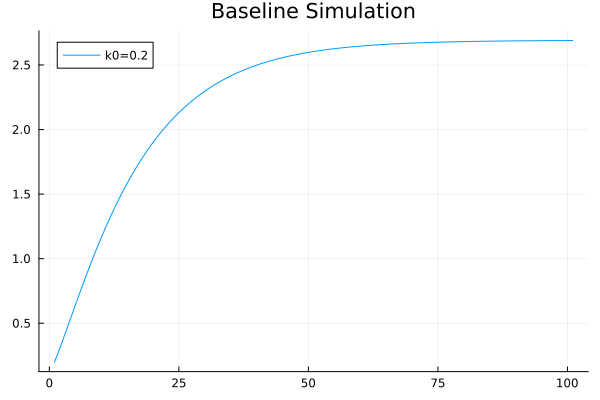

In [24]:
plot(sim; title="Baseline Simulation", label="k0=0.2")

In [27]:
# plot different levels of capital
# 🐉

klevels = [0.5, 1., 1.5, 2, 2.5, 3, 3.5]
simulations = [simulate(k0, model) for k0 in klevels];


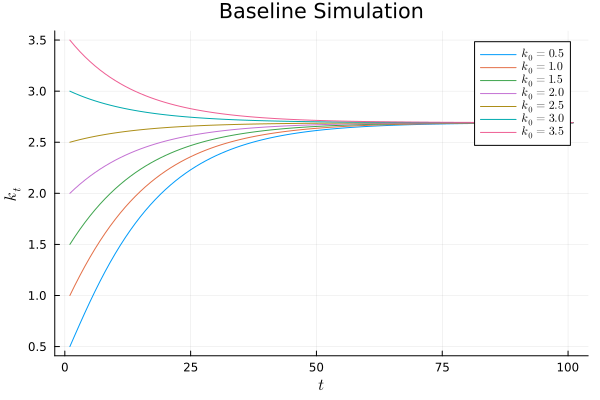

In [37]:
# 🐉

# create initially empty plot
pl = plot(; title="Baseline Simulation", xlabel="\$t\$", ylabel="\$k_t\$")

for (k, sim) in zip(klevels, simulations)
    plot!(pl, sim; label="\$k_0=$k\$")
end

pl

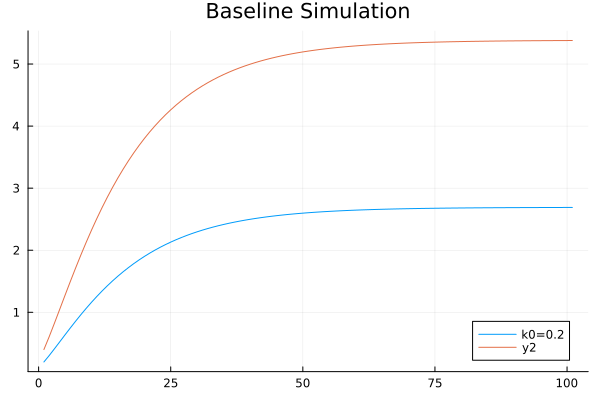

In [30]:
# to add two lines, you need modify an existing plot
pl = plot(sim; title="Baseline Simulation", label="k0=0.2")
plot!(pl, sim*2)

In [42]:
# what if I want to change the parametrization? for a different saving rate
k0 = 0.2
sim1 = simulate(k0, merge(model, (;s=0.2)));
sim2 = simulate(k0, merge(model, (;s=0.3)));

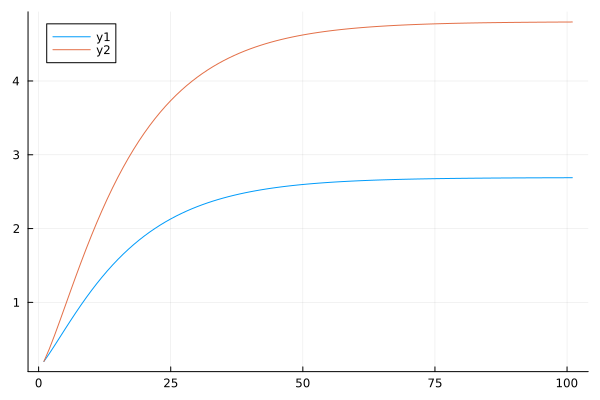

In [43]:
pl = plot(sim1)
plot!(sim2)

__Suppose you were interested in using `f` to compute the steady-state. What would you propose to measure convergence speed? To speed-up convergence? Implement these ideas.__